In [2]:
import numpy as np

# BARD

In [6]:
# load Data
import sys
thismodule = sys.modules[__name__]

with np.load('data/BARD.npz', allow_pickle=True) as data:
    for k in data.keys():
        setattr(thismodule, k, data[k])
            
print(ecgs.shape, ecgs_HB.shape, ecgs_HB_patients.shape, ecgs_HB_samples.shape)

(717,) (15280, 100, 12) (15280,) (15280,)


In [8]:
# append beats to array
beats = ecgs_HB
print(beats.shape)

(15280, 100, 12)


# PTB-XL

In [9]:
# load
thismodule = sys.modules[__name__]
with np.load('data/PTB_XL_HB_1s_window.npz', allow_pickle=True) as data:
    for k in data.keys():
        print(k)
        if 'text' in k:
            setattr(thismodule, k, data[k])
        else:
            setattr(thismodule, k, data[k].astype(float))

X_train
X_val
X_test
Y_train
Y_train_text
Y_val
Y_test


In [11]:
print(X_train.shape, X_val.shape, X_test.shape)

(229753, 100, 12) (29098, 100, 12) (29518, 100, 12)


In [13]:
print(ecgs_HB.shape[0] + X_train.shape[0] + X_val.shape[0] + X_test.shape[0])

303649


In [12]:
beats = np.concatenate([beats, X_train, X_val, X_test], axis=0)
print(beats.shape)

(303649, 100, 12)


# DAT - China

In [14]:
thismodule = sys.modules[__name__]
NP_DATA = 'data/DAT_China_pretrain_1s_HB.npz'

with np.load(NP_DATA, allow_pickle=True) as data:
    for k in data.keys():
        if 'text' in k:
            setattr(thismodule, k, data[k])
        else:
            setattr(thismodule, k, data[k].astype(float))
        
print("\nLoaded data:")
print("X_HB:", X.shape)
print("X_folds:", X_folds.shape)
print("Y_HB:", Y.shape)
print("Y_text_HB:", Y_text.shape)


Loaded data:
X_HB: (282615, 100, 12)
X_folds: (282615,)
Y_HB: (282615,)
Y_text_HB: (282615,)


In [15]:
beats = np.concatenate([beats, X], axis=0)
print(beats.shape)


(586264, 100, 12)


In [16]:
# save
NP_PATH = 'data/all_pretrain_unlabelled_HB.npz'

np.savez(NP_PATH, beats=beats)

print("Saved to", NP_PATH)
print("Done.")

Saved to data/all_pretrain_unlabelled_HB.npz
Done.


In [17]:
# load
thismodule = sys.modules[__name__]

with np.load(NP_PATH, allow_pickle=True) as data:
    for k in data.keys():
        setattr(thismodule, k, data[k])
        
print(beats.shape)

(586264, 100, 12)


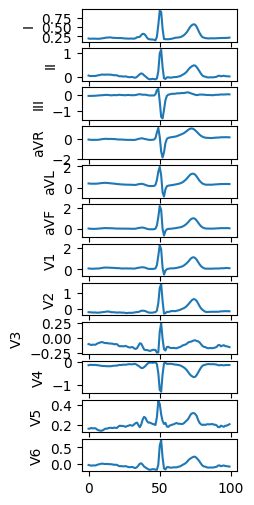

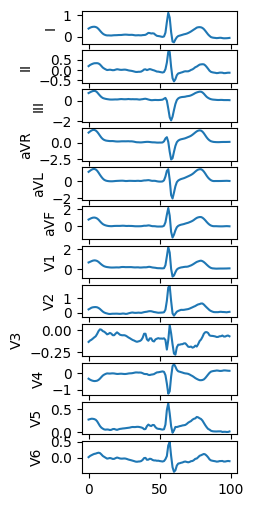

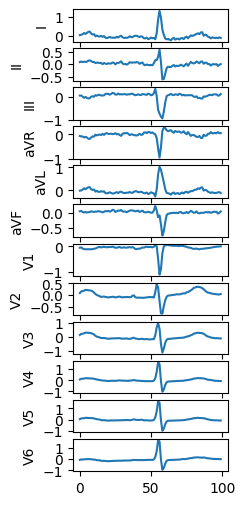

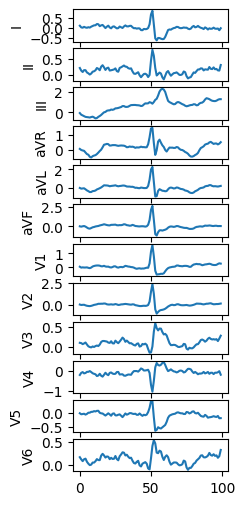

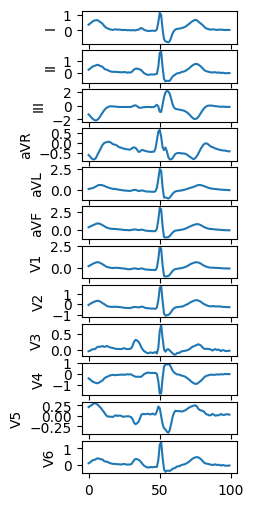

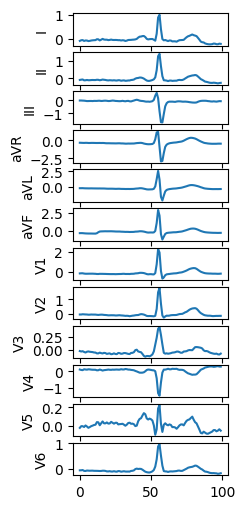

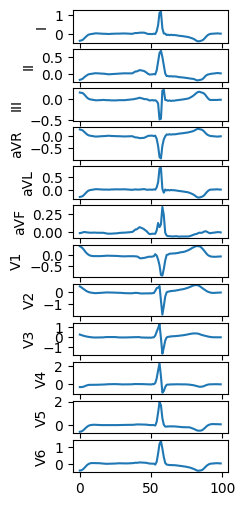

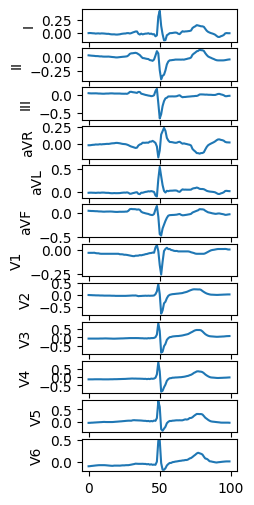

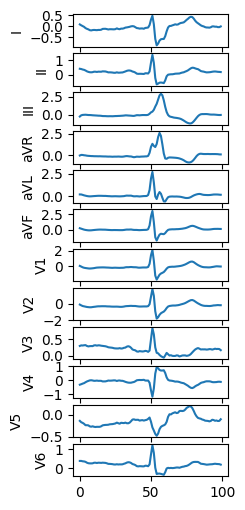

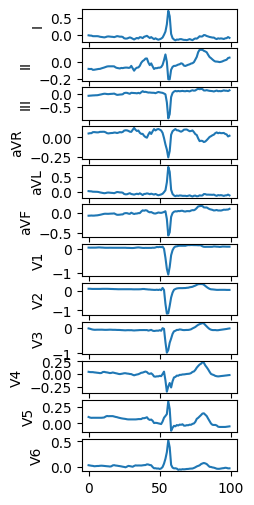

In [18]:
# visualize 10 random beats
import matplotlib.pyplot as plt
import data_visualisation as dv

for i in range(10):
    beat = beats[np.random.randint(beats.shape[0])]
    dv.plot_12_lead_ecg(beat)
    